In [1]:
"""
This notebook generates plots in Fig. 1 of the paper.
For example track plots, please see the example tracks directory.
"""

'\nThis notebook generates plots in Fig. 1 of the paper.\nFor example track plots, please see the example tracks directory.\n'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import h5py
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau

from matplotlib.colors import LinearSegmentedColormap
import mpl_scatter_density # needed for density scatter plots
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize

# COLORS:
# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list("white_viridis", [
    (0, "#ffffff"),
    (1e-20, "#440053"),
    (0.2, "#404388"),
    (0.4, "#2a788e"),
    (0.6, "#21a784"),
    (0.8, "#78d151"),
    (1, "#fde624"),
], N=256)
# "Viridis-like" colormap with white background
white_viridis_r = LinearSegmentedColormap.from_list("white_viridis", [
    (0, "#ffffff"),
    (1e-20, "#fde624"),
    (0.4, "#78d151"),
    (0.6, "#21a784"),
    (0.7, "#2a788e"),
    (0.8, "#404388"),
    (1, "#440053"),
], N=256)
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]

In [6]:
# LOAD DATA

SCRATCH = "/Users/adamhe/github/scratch"

jsd = {5: [], 10: [], 15: [], 20: [], 30: []}
track_pearson = {5: [], 10: [], 15: [], 20: [], 30: []}
quantity_log_pearson = {5: [], 10: [], 15: [], 20: [], 30: []}
for n in jsd:
    for r in range(5):
        hf = h5py.File(
            os.path.join(SCRATCH, f"ensemble_n{n}_run{r}_fold_0_performance_metrics.h5")
        )
        jsd[n].append(np.nanmean(hf["track_js_distance"][:]))
        track_pearson[n].append(np.nanmean(hf["track_pearson"][:]))
        quantity_log_pearson[n].append(hf["quantity_log_pearson"][:][0])

In [7]:
jsd_df = pd.DataFrame(jsd).melt()
jsd_df.columns = ["n", "JSD"]

track_pearson_df = pd.DataFrame(track_pearson).melt()
track_pearson_df.columns = ["n", "Track Pearson"]

quantity_log_pearson_df = pd.DataFrame(quantity_log_pearson).melt()
quantity_log_pearson_df.columns = ["n", "Quantity Log Pearson"]

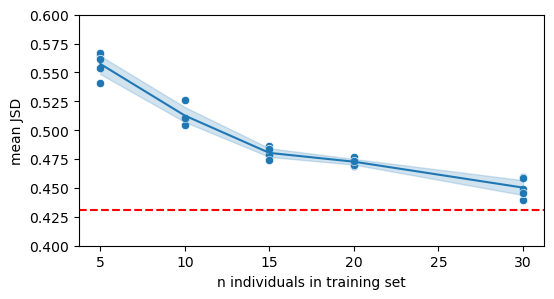

In [8]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(1, 1, 1)

sns.scatterplot(data=jsd_df, x="n", y="JSD")
sns.lineplot(data=jsd_df, x="n", y="JSD")
plt.axhline(0.431, color="red", linestyle="--")
#plt.axhline(0.3509571345224863, color="black")
ax.set_ylim(0.4, 0.6)

ax.set_xlabel("n individuals in training set")
ax.set_ylabel("mean JSD")
plt.savefig("clipnet_jsd_profile_predictions.pdf")

(0.4, 0.8)

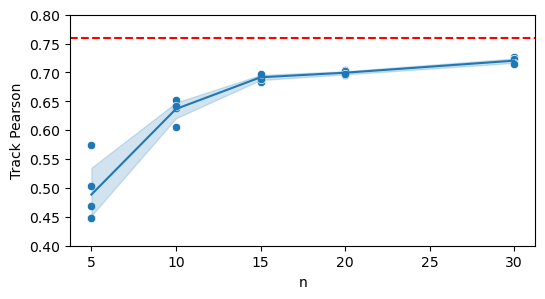

In [13]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(1, 1, 1)

sns.scatterplot(data=track_pearson_df, x="n", y="Track Pearson")
sns.lineplot(data=track_pearson_df, x="n", y="Track Pearson")
plt.axhline(0.76, color="red", linestyle="--")
#plt.axhline(0.3509571345224863, color="black")
ax.set_ylim(0.4, 0.8)

#ax.set_xlabel("n individuals in training set")
#ax.set_ylabel("mean JSD")
#plt.savefig("clipnet_jsd_profile_predictions.pdf")

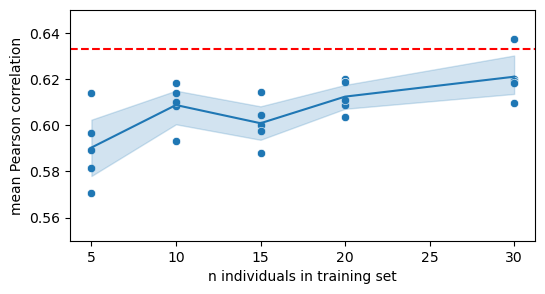

In [14]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(1, 1, 1)

sns.scatterplot(data=quantity_log_pearson_df, x="n", y="Quantity Log Pearson", ax=ax)
sns.lineplot(data=quantity_log_pearson_df, x="n", y="Quantity Log Pearson", ax=ax)
plt.axhline(0.633, color="red", linestyle="--")
#plt.axhline(0.3509571345224863, color="black")
ax.set_ylim(0.55, 0.65)

ax.set_xlabel("n individuals in training set")
ax.set_ylabel("mean Pearson correlation")
plt.savefig("clipnet_pearson_log_quantity_predictions.pdf")

In [51]:
spearmanr(jsd_df["n"], jsd_df["JSD"])

SignificanceResult(statistic=-0.9766583529881566, pvalue=7.286240776157704e-17)

In [52]:
spearmanr(quantity_log_pearson_df["n"], quantity_log_pearson_df["Quantity Log Pearson"])

SignificanceResult(statistic=0.6393386005504799, pvalue=0.0005801430723762268)

In [ ]:
#0    0.415713
#1    0.313276
#2    0.342822
#3    0.408043
#4    0.347488
#5    0.346896
#6    0.329929
#7    0.344541
#8    0.309906